#        ----------------------------- DESIGN PATTERNS -----------------------
#        ______BEHAVIORAL PATTERNS

## Observer

In [24]:
class Subject(object): #Represents what is being 'observed'

    def __init__(self):
        self._observers = [] # This where references to all the observers are being kept
                             # Note that this is a one-to-many relationship: there will be one subject to be observed by multiple _observers

    def attach(self, observer):
        if observer not in self._observers: #If the observer is not already in the observers list
            self._observers.append(observer) # append the observer to the list

    def detach(self, observer): #Simply remove the observer
        try:
            self._observers.remove(observer)
        except ValueError:
            pass

    def notify(self, modifier=None):
        for observer in self._observers: # For all the observers in the list
            if modifier != observer: # Don't notify the observer who is actually updating the temperature 
                observer.update(self) # Alert the observers!

In [25]:
class Core(Subject): #Inherits from the Subject class

    def __init__(self, name=""):
        Subject.__init__(self)
        self._name = name #Set the name of the core
        self._temp = 0 #Initialize the temperature of the core

    @property #Getter that gets the core temperature
    def temp(self):
        return self._temp

    @temp.setter #Setter that sets the core temperature
    def temp(self, temp):
        self._temp = temp
        print("------",temp)
        self.notify() #Notify the observers whenever somebody changes the core temperature

In [26]:
class TempViewer:

    def update(self, subject): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        print("Temperature Viewer: {} has Temperature {}".format(subject._name, subject._temp))

In [141]:
#Let's create our subjects
c1 = Core("Core 1")
c2 = Core("Core 2")

#Let's create our observers
v1 = TempViewer()
v2 = TempViewer()

#Let's attach our observers to the first core
c1.attach(v1)
c1.attach(v2)

#Let's change the temperature of our first core
c1.temp = 80

v3 = TempViewer()
c1.attach(v3)
c1.temp = 90

print(c1.temp)


------ 80
Temperature Viewer: Core 1 has Temperature 80
Temperature Viewer: Core 1 has Temperature 80
------ 90
Temperature Viewer: Core 1 has Temperature 90
Temperature Viewer: Core 1 has Temperature 90
Temperature Viewer: Core 1 has Temperature 90
90


In [36]:
import threading
import time
import pdb

class Downloader(threading.Thread):
    def run(self):
        print( 'downloading')
        for i in range(1,5):
            self.i = i
            time.sleep(2)
            print('unfunf')
            return 'hello world'

class Worker(threading.Thread):
    def run(self):
        for i in range(1,5):
            print(t.i)
            print ('worker running: %i (%i)' % (i, t.i))
            time.sleep(1)
            t.join()
            print('done')

t = Downloader()
t.start()

time.sleep(1)

t1 = Worker()
t1.start()

t2 = Worker()
t2.start()

t3 = Worker()
t3.start()

downloading
1
worker running: 1 (1)
11
worker running: 1 (1)

worker running: 1 (1)
unfunf
done
1
worker running: 2 (1)
done
1
worker running: 2 (1)
done
1
worker running: 2 (1)
done
1
worker running: 3 (1)
done
1
worker running: 3 (1)
done
1
worker running: 3 (1)
done
1
worker running: 4 (1)
done
1
worker running: 4 (1)
done
1
worker running: 4 (1)
done
done
done


## Vistitor Pattern

In [56]:
class House(object): #The class being visited 
    def accept(self, visitor):
        """Interface to accept a visitor"""
        visitor.visit(self) #Triggers the visiting operation!

    def work_on_hvac(self, hvac_specialist):
        print("-----",hvac_specialist)
        print(self, "worked on by", hvac_specialist) #Note that we now have a reference to the HVAC specialist object in the house object!

    def work_on_electricity(self, electrician):
        print(self, "worked on by", electrician) #Note that we now have a reference to the electrician object in the house object!

    def __str__(self):
        """Simply return the class name when the House object is printed"""
        return self.__class__.__name__

In [57]:
class Visitor(object):
    """Abstract visitor"""
    def __str__(self):
        """Simply return the class name when the Visitor object is printed"""
        return self.__class__.__name__


class HvacSpecialist(Visitor): #Inherits from the parent class, Visitor
    """Concrete visitor: HVAC specialist"""
    def visit(self, house):
        house.work_on_hvac(self) #Note that the visitor now has a reference to the house object


class Electrician(Visitor): #Inherits from the parent class, Visitor
    """Concrete visitor: electrician"""
    def visit(self, house):
        house.work_on_electricity(self) #Note that the visitor now has a reference to the house object

In [58]:
#Create an HVAC specialist
hv = HvacSpecialist()
#Create an electrician
e = Electrician()

#Create a house
home = House()

#Let the house accept the HVAC specialist and work on the house by invoking the visit() method
home.accept(hv)

#Let the house accept the electrician and work on the house by invoking the visit() method
# home.accept(e)

----- HvacSpecialist
House worked on by HvacSpecialist


## Iterator Pattern

#### Why the need for it: Problem Statement
The Iterator Pattern is implemented to provide the client with a function or a class whose instance performs tasks of an iterator.

In [17]:
def count_to(count):
    """Our iterator implementation"""

    #Our list
    numbers_in_german = ["eins", "zwei", "drei", "vier", "funf"]

    #Our built-in iterator
    #Creates a tuple such as (1, "eins")
    iterator = zip(range(count), numbers_in_german)

    #Iterate through our iterable list
    #Extract the German numbers
    #Put them in a generator called number
    for i in iterator:
        #Returns a 'generator' containing numbers in German
        yield i
#         yield i
#     return iterator

In [21]:
#Let's test the generator returned by our iterator
# for num in count_to(3):
#     print("{}".format(num))

itr = count_to(5)

# print(itr.__iter__())
for num in count_to(4):
    print("{}".format(num))

# c  = count_to(3)

(0, 'eins')
(0, 'eins')
(1, 'zwei')
(2, 'drei')
(3, 'vier')


In [9]:
c.__next__()

(0, 'eins')

## Strategy

# 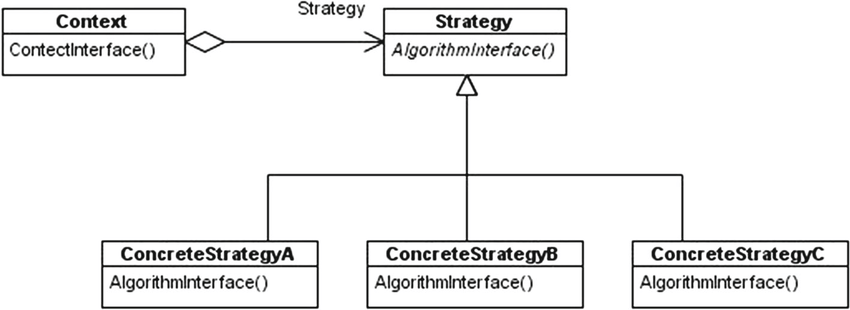

In [25]:
import types #Import the types module

class Strategy:
    """The Strategy Pattern class"""    
    def __init__(self, function=None):
        self.name = "Default Strategy"

        #If a reference to a function is provided, replace the execute() method with the given function
        if function:
            self.execute = types.MethodType(function, self)
            
    def execute(self): #This gets replaced by another version if another strategy is provided.
        """The defaut method that prints the name of the strategy being used"""
        print("{} is used!".format(self.name))

In [26]:
#Replacement method 1
def strategy_one(self):
    print("{} is used to execute method 1".format(self.name))

#Replacement method 2    
def strategy_two(self):
    print("{} is used to execute method 2".format(self.name))

In [27]:
    
#Let's create our default strategy
s0 = Strategy()
#Let's execute our default strategy
# s0.execute()

#Let's create the first varition of our default strategy by providing a new behavior
s1 = Strategy(strategy_one)
#Let's set its name
s1.name = "Strategy One"
#Let's execute the strategy
s1.execute()

s2 = Strategy(strategy_two)
s2.name = "Strategy Two"
s2.execute()

<bound method strategy_one of <__main__.Strategy object at 0x7fecc83addd8>>
Strategy One is used to execute method 1
<bound method strategy_two of <__main__.Strategy object at 0x7fecc83adcf8>>
Strategy Two is used to execute method 2


## Chain Of Responsibility

In [142]:
class Handler: #Abstract handler
    """Abstract Handler"""
    def __init__(self, successor):
        self._successor = successor # Define who is the next handler

    def handle(self, request):
            handled = self._handle(request) #If handled, stop here

            #Otherwise, keep going
            if not handled:
                self._successor.handle(request)	

    def _handle(self, request):
        raise NotImplementedError('Must provide implementation in subclass!')

In [146]:
class ConcreteHandler1(Handler): # Inherits from the abstract handler
    """Concrete handler 1"""
    def _handle(self, request):
        if 0 < request <= 10: # Provide a condition for handling
            print("Request {} handled in handler 1".format(request))
            return True # Indicates that the request has been handled

In [150]:
class DefaultHandler(Handler): # Inherits from the abstract handler
    """Default handler"""

    def _handle(self, request):
        """If there is no handler available"""
        #No condition checking since this is a default handler
        print("End of chain, no handler for {}".format(request))
        return True # Indicates that the request has been handled

In [162]:
class Client: # Using handlers
    def __init__(self):
        # Create handlers and use them in a sequence you want
        # Note that the default handler has no successor

        self.handler = ConcreteHandler1(DefaultHandler(None)) 
#         self.handler = DefaultHandler(ConcreteHandler1(None))
            
    def delegate(self, requests): # Send your requests one at a time for handlers to handle
        for request in requests:
                self.handler.handle(request)

In [163]:
# Create a client
c = Client()

# Create requests
requests = [2, 5, 30]

# Send the requests
c.delegate(requests)

Request 2 handled in handler 1
Request 5 handled in handler 1
End of chain, no handler for 30
